In [75]:
import numpy as np
import matplotlib.pyplot as plt
import pickle
import os

In [76]:
def unpickle(file):
    with open(file, 'rb') as fo:
        data_dict = pickle.load(fo, encoding='bytes')
    return data_dict

In [77]:
def rgb_to_grayscale(rgb_image):
    height, width, _ = rgb_image.shape
    gray_image = np.zeros((height, width), dtype=np.uint8)

    for i in range(height):
        for j in range(width):
            r, g, b = rgb_image[i, j]
            gray_value = int(0.299 * r + 0.587 * g + 0.114 * b)
            gray_image[i, j] = gray_value

    return gray_image

In [78]:
'''
# Load the CIFAR-10 batch
cifar_data = unpickle('cifar-10-batches-py/data_batch_1')

image_data = cifar_data[b'data']
labels = cifar_data[b'labels']

# Define the number of images you want to display
num_images = 1000

# Create a new figure with a proper grid layout
plt.figure(figsize=(20, 200))  # Adjust the figure size: 20 for width and 200 for height to fit 1000 images

# Loop over the first 1000 images
for i in range(num_images):
    first_image = image_data[i].reshape(3, 32, 32)

    # Extract RGB channels
    r = first_image[0, :, :]
    g = first_image[1, :, :]
    b = first_image[2, :, :]

    # Combine R, G, B into one image (32x32x3)
    rgb_image = np.stack([r, g, b], axis=2)

    # Create subplots: 100 rows and 10 columns
    plt.subplot(100, 10, i+1)  # 100 rows and 10 columns to display 1000 images
    plt.imshow(rgb_image)
    plt.axis('off')  # Turn off the axis for cleaner output

# Adjust layout and display the figure
plt.tight_layout()
plt.show()
'''

"\n# Load the CIFAR-10 batch\ncifar_data = unpickle('cifar-10-batches-py/data_batch_1')\n\nimage_data = cifar_data[b'data']\nlabels = cifar_data[b'labels']\n\n# Define the number of images you want to display\nnum_images = 1000\n\n# Create a new figure with a proper grid layout\nplt.figure(figsize=(20, 200))  # Adjust the figure size: 20 for width and 200 for height to fit 1000 images\n\n# Loop over the first 1000 images\nfor i in range(num_images):\n    first_image = image_data[i].reshape(3, 32, 32)\n\n    # Extract RGB channels\n    r = first_image[0, :, :]\n    g = first_image[1, :, :]\n    b = first_image[2, :, :]\n\n    # Combine R, G, B into one image (32x32x3)\n    rgb_image = np.stack([r, g, b], axis=2)\n\n    # Create subplots: 100 rows and 10 columns\n    plt.subplot(100, 10, i+1)  # 100 rows and 10 columns to display 1000 images\n    plt.imshow(rgb_image)\n    plt.axis('off')  # Turn off the axis for cleaner output\n\n# Adjust layout and display the figure\nplt.tight_layout(

***Part 1***

Number of images: 10000
Number of labels: 10000


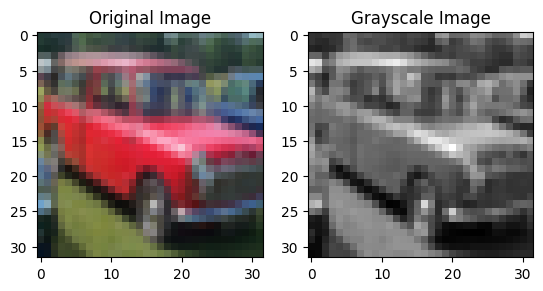

In [79]:
#path = "C:/Users/ramosv/Desktop/Vision/Raw-Computer-Vision/"
#cifar_data = unpickle(f'{path}cifar-10-batches-py/data_batch_1')
cifar_data = unpickle(f'cifar-10-batches-py/data_batch_1')

image_data = cifar_data[b'data']
labels = cifar_data[b'labels']

print("Number of images:", len(image_data))
print("Number of labels:", len(labels))

image_index = 136
first_image = image_data[image_index].reshape(3, 32, 32)

r = first_image[0, :, :]
g = first_image[1, :, :]
b = first_image[2, :, :]

rgb_image = np.stack([r, g, b], axis=2)

def rgb_to_grayscale(rgb_image):
    return np.dot(rgb_image[...,:3], [0.2989, 0.5870, 0.1140])

car_gray_image = rgb_to_grayscale(rgb_image)

plt.subplot(1, 2, 1)
plt.imshow(rgb_image)
plt.title('Original Image')

plt.subplot(1, 2, 2)
plt.imshow(car_gray_image, cmap='gray')
plt.title('Grayscale Image')

plt.show()

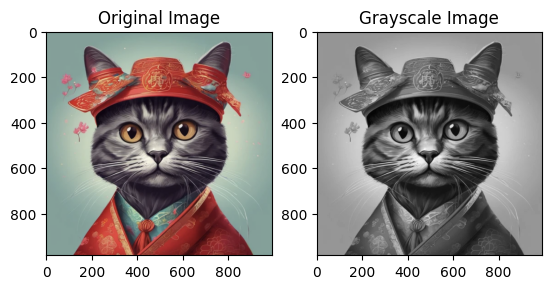

In [80]:
from PIL import Image

# Function to read and convert PNG image
def load_image(image_path):
    image = Image.open(image_path)
    image = np.array(image)
    return image

def rgb_to_grayscale(rgb_image):
    return np.dot(rgb_image[...,:3], [0.2989, 0.5870, 0.1140])

# Load a PNG image
image_path = 'coolcat.png'
rgb_image = load_image(image_path)

# Convert to grayscale
gray_image = rgb_to_grayscale(rgb_image)

# Display the original and grayscale images
plt.subplot(1, 2, 1)
plt.imshow(rgb_image)
plt.title('Original Image')

plt.subplot(1, 2, 2)
plt.imshow(gray_image, cmap='gray')
plt.title('Grayscale Image')

plt.show()

***Part 2***

In [81]:
## Add white gaussian noise to the grayscale image. Show the effects of the noise when
def guassian_noise(image, stddev):
    noise = np.random.normal(0, stddev, image.shape)
    image_noise = image + noise
    image_noise = np.clip(image_noise, 0, 255)
    return image_noise


Text(0.5, 1.0, 'Car Grayscale')

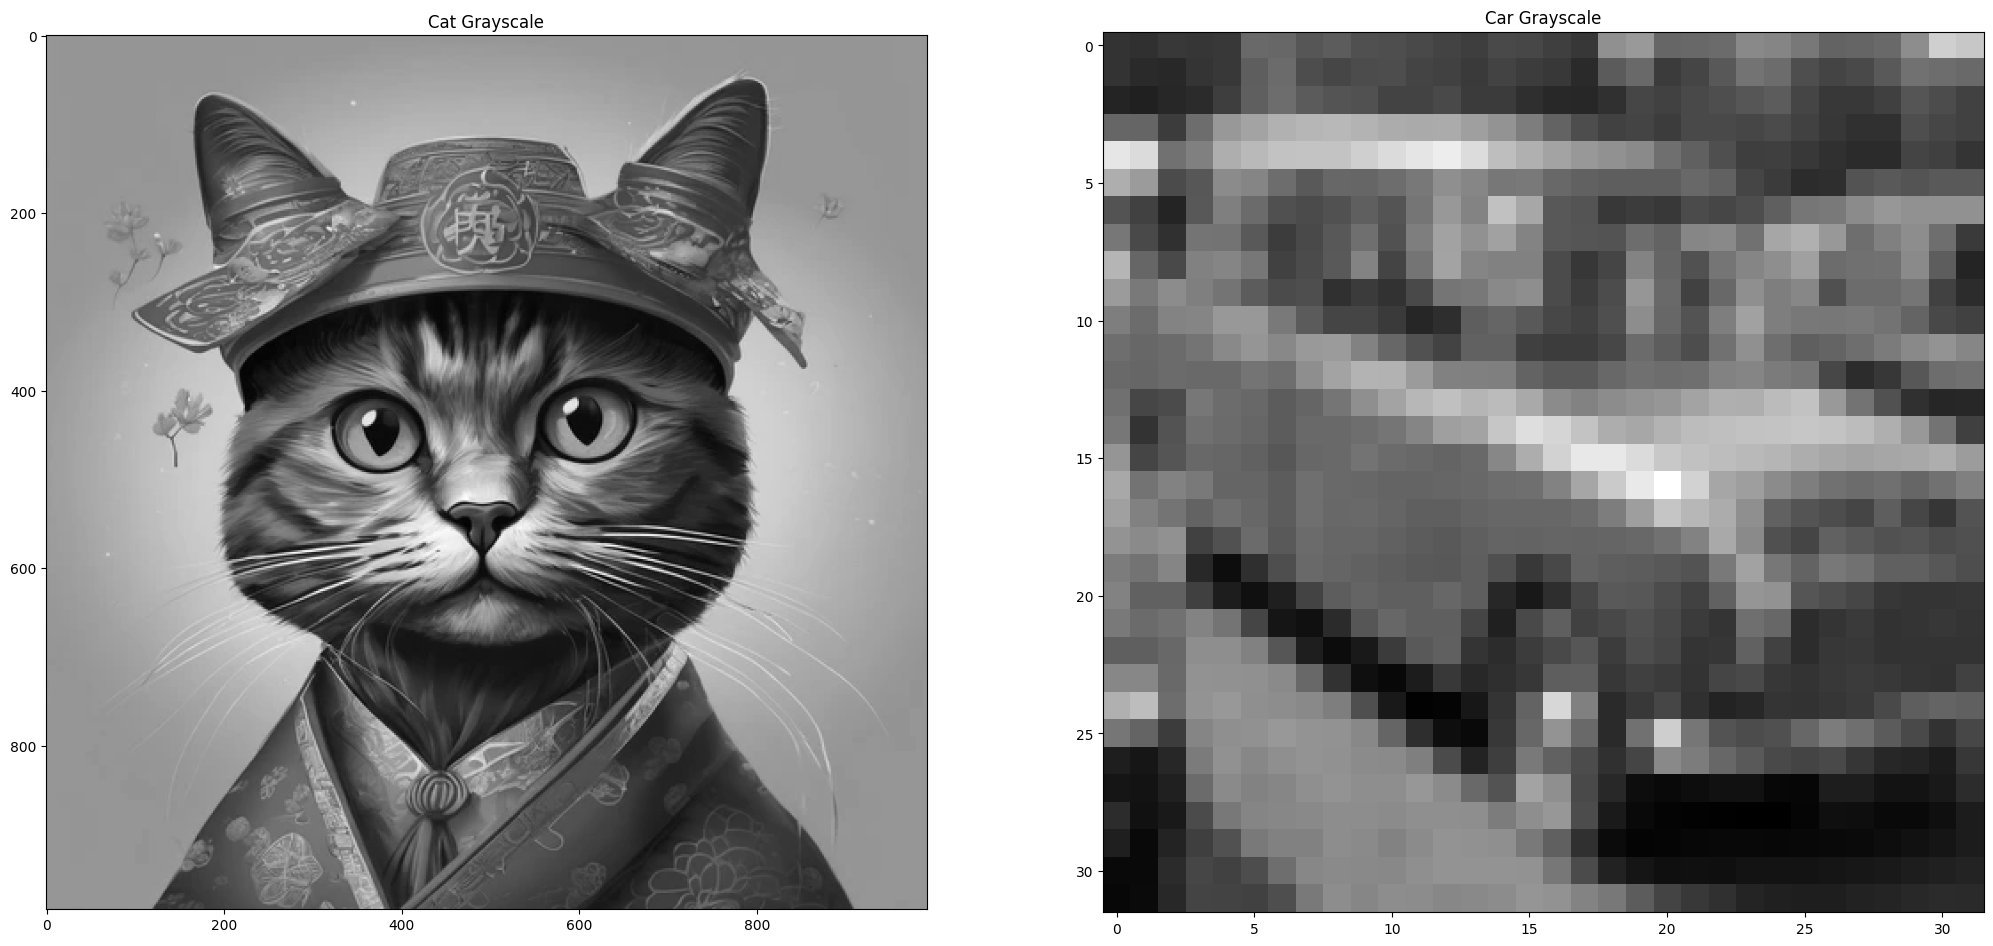

In [82]:
# Standard deviations to test
std_devs = [1, 10, 30, 50]

# Plot the original and noisy images
plt.figure(figsize=(25, 12))
plt.subplot(1, 2, 1)
plt.imshow(gray_image, cmap='gray')
plt.title('Cat Grayscale')

plt.subplot(1, 2, 2)
plt.imshow(car_gray_image, cmap='gray')
plt.title('Car Grayscale')

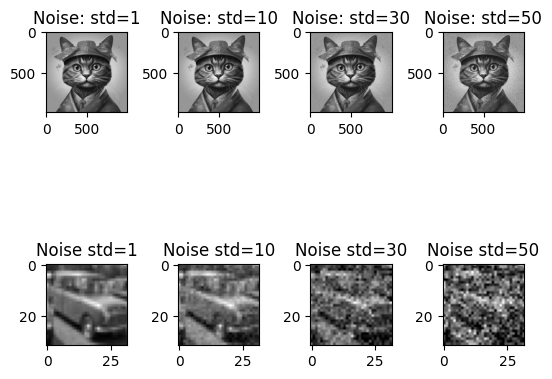

In [83]:
# Add and display Gaussian noise with different standard deviations
for i, std in enumerate(std_devs):
    noisy_image = guassian_noise(gray_image, std)
    plt.subplot(2, len(std_devs) + 1, i + 2)
    plt.imshow(noisy_image, cmap='gray')
    plt.title(f'Noise: std={std}')

    noisy_car_image = guassian_noise(car_gray_image, std)
    plt.subplot(2, len(std_devs) + 1, len(std_devs) + i + 3)
    plt.imshow(noisy_car_image, cmap='gray')
    plt.title(f'Noise std={std}')

plt.tight_layout()
plt.show()

***Part 3***
- Add Salt and Pepper noise to 10% and 30% of the pixels in the grayscale image in 1.
- Salt and Pepper noise is added to an image by adding random bright and random dark
- pixels all over the image.

In [84]:
def salt_pepper_noise(image, salt, pepper):
    noisy_image = np.copy(image)
    #print(image.shape)
    height, width = image.shape

    num_salt = np.ceil(salt * height * width)
    salt_cordinates = []

    for i in image.shape:
        salt_cordinates.append(np.random.randint(0, i, int(num_salt)))

    pepper_cordinates = []
    num_pepper = np.ceil(pepper * height * width)

    for i in image.shape:
        pepper_cordinates.append(np.random.randint(0, i, int(num_pepper)))

    # 255 is white
    noisy_image[salt_cordinates[0], salt_cordinates[1]] = 255

    # 0 is black
    noisy_image[pepper_cordinates[0], pepper_cordinates[1]] = 0

    return noisy_image


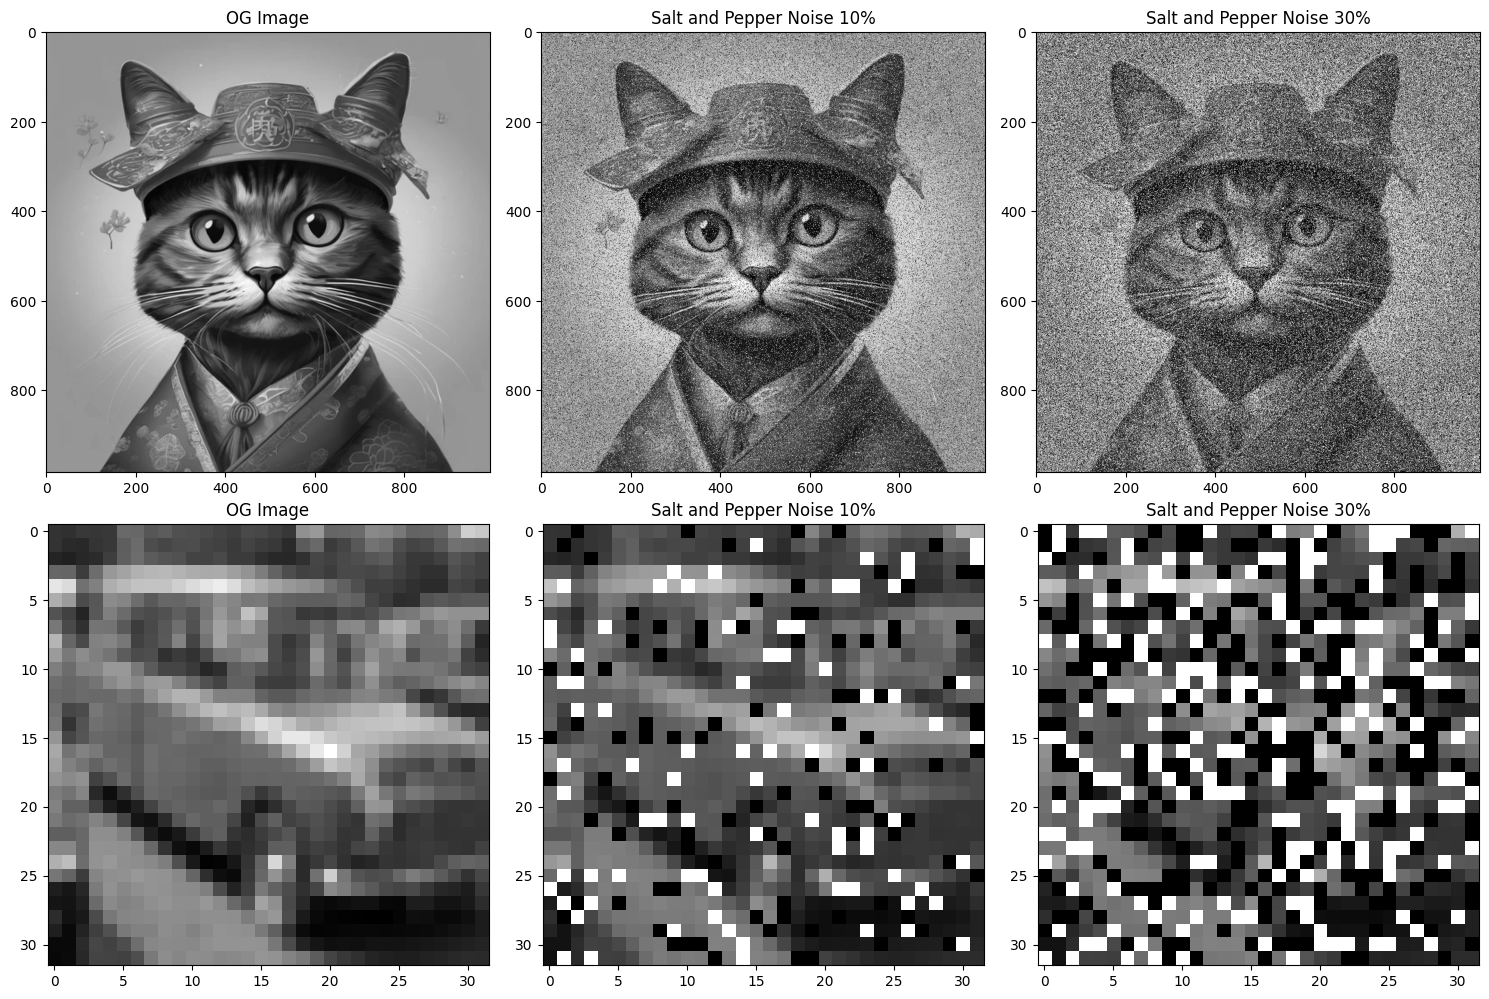

In [85]:
nosiy_image_10 = salt_pepper_noise(gray_image, 0.1,0.1)
noisy_image_30 = salt_pepper_noise(gray_image, 0.3,0.3)
car_nosiy_image_10 = salt_pepper_noise(car_gray_image, 0.1,0.1)
car_noisy_image_30 = salt_pepper_noise(car_gray_image, 0.3,0.3)

plt.figure(figsize=(15, 10))
plt.subplot(2, 3, 1)
plt.imshow(gray_image, cmap='gray')
plt.title('OG Image')

plt.subplot(2, 3, 2)
plt.imshow(nosiy_image_10, cmap='gray')
plt.title('Salt and Pepper Noise 10%')

plt.subplot(2, 3, 3)
plt.imshow(noisy_image_30, cmap='gray')
plt.title('Salt and Pepper Noise 30%')

plt.subplot(2, 3, 4)
plt.imshow(car_gray_image, cmap='gray')
plt.title('OG Image')

plt.subplot(2, 3, 5)
plt.imshow(car_nosiy_image_10, cmap='gray')
plt.title('Salt and Pepper Noise 10%')

plt.subplot(2, 3, 6)
plt.imshow(car_noisy_image_30, cmap='gray')
plt.title('Salt and Pepper Noise 30%')

plt.tight_layout()
plt.show()



***Part 4***

In [86]:
def box_filter(image, kernel_size):
    padded_image = np.pad(image, kernel_size//2, mode='reflect')
    output_image = np.zeros_like(image)
    height, width = image.shape
    for i in range(height):
        for j in range(width):
            neighborhood = padded_image[i:i+kernel_size, j:j+kernel_size]
            output_image[i, j] = np.mean(neighborhood)

    return output_image


In [87]:
def median_filter(image, kernel_size):
    padded_image = np.pad(image, kernel_size//2, mode='reflect')
    output_image = np.zeros_like(image)
    height, width = image.shape
    for i in range(height):
        for j in range(width):
            neighborhood = padded_image[i:i+kernel_size, j:j+kernel_size]
            output_image[i, j] = np.median(neighborhood)

    return output_image

In [88]:
def guassian_kernel(size, sigma):
    center = size // 2
    ax = np.arange(size) - center
    xx, yy = np.meshgrid(ax, ax)
    kernel = np.exp(-(xx**2 + yy**2) / (2.0 * sigma**2))
    return kernel / np.sum(kernel)

In [89]:
def guassian_filter(image, kernel_size):
    sigma = 1
    kernel = guassian_kernel(kernel_size, sigma)
    padded_image = np.pad(image, kernel_size//2, mode='reflect')
    output_image = np.zeros_like(image)
    height, width = image.shape

    for i in range(height):
        for j in range(width):
            neighborhood = padded_image[i:i+kernel_size, j:j+kernel_size]
            output_image[i, j] = np.sum(neighborhood * kernel)

    return output_image

In [90]:
noisy_guassian_image = guassian_noise(gray_image, 50)
noisy_salt_pepper = salt_pepper_noise(gray_image, 0.3, 0.3)
box_filter_guassian = box_filter(noisy_guassian_image, 3)
box_filter_salt_pepper = box_filter(noisy_salt_pepper, 3)

median_filter_guassian = median_filter(noisy_guassian_image, 3)
median_filter_salt_pepper = median_filter(noisy_salt_pepper, 3)

guassian_filter_guassian = guassian_filter(noisy_guassian_image,3)
guassian_filter_salt_pepper = guassian_filter(noisy_salt_pepper, 3)

car_noisy_guassian_image = guassian_noise(car_gray_image, 50)
car_noisy_salt_pepper = salt_pepper_noise(car_gray_image, 0.3, 0.3)

car_box_filter_guassian = box_filter(car_noisy_guassian_image, 3)
car_box_filter_salt_pepper = box_filter(car_noisy_salt_pepper, 3)

car_median_filter_guassian = median_filter(car_noisy_guassian_image, 3)
car_median_filter_salt_pepper = median_filter(car_noisy_salt_pepper, 3)

car_guassian_filter_guassian = guassian_filter(car_noisy_guassian_image,3)
car_guassian_filter_salt_pepper = guassian_filter(car_noisy_salt_pepper, 3)

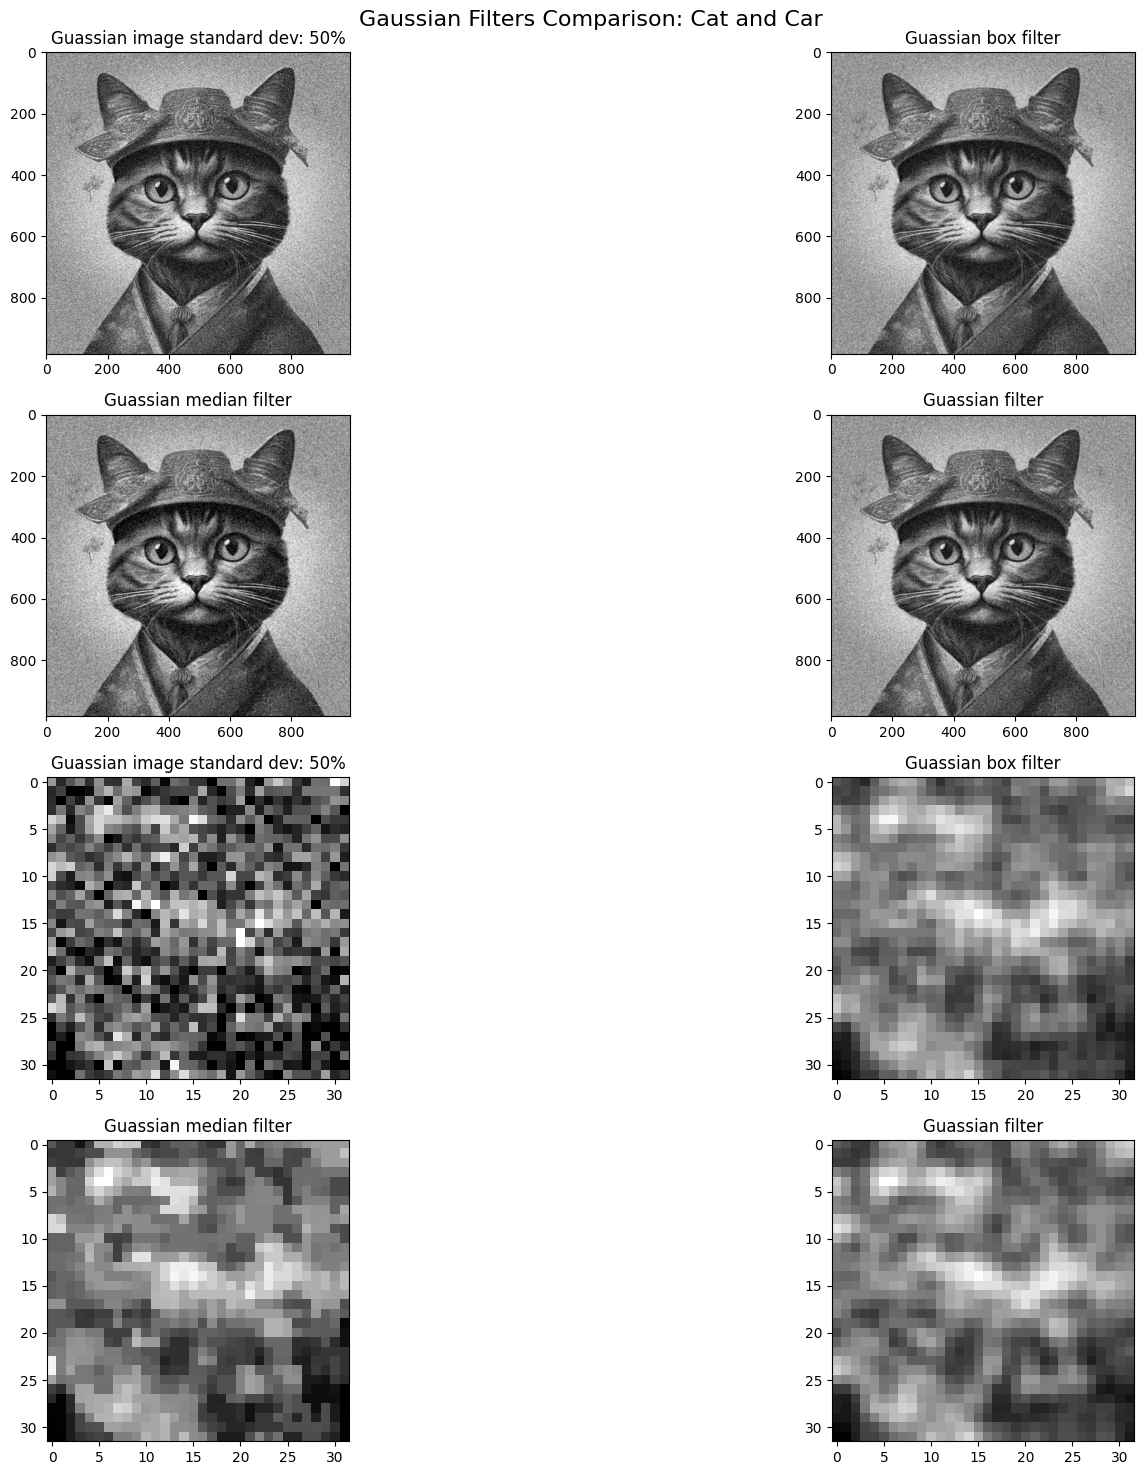

In [91]:
plt.figure(figsize=(20, 15))

#cat
plt.subplot(4,2,1)
plt.imshow(noisy_guassian_image, cmap='gray')
plt.title('Guassian image standard dev: 50%')

plt.subplot(4,2,2)
plt.imshow(box_filter_guassian, cmap='gray')
plt.title('Guassian box filter')

plt.subplot(4,2,3)
plt.imshow(median_filter_guassian, cmap='gray')
plt.title('Guassian median filter')

plt.subplot(4,2,4)
plt.imshow(guassian_filter_guassian, cmap='gray')
plt.title('Guassian filter')

# car
plt.subplot(4,2,5)
plt.imshow(car_noisy_guassian_image, cmap='gray')
plt.title('Guassian image standard dev: 50%')

plt.subplot(4,2,6)
plt.imshow(car_box_filter_guassian, cmap='gray')
plt.title('Guassian box filter')

plt.subplot(4,2,7)
plt.imshow(car_median_filter_guassian, cmap='gray')
plt.title('Guassian median filter')

plt.subplot(4,2,8)
plt.imshow(car_guassian_filter_guassian, cmap='gray')
plt.title('Guassian filter')

plt.suptitle('Gaussian Filters Comparison: Cat and Car', fontsize=16)
plt.tight_layout()
plt.show()

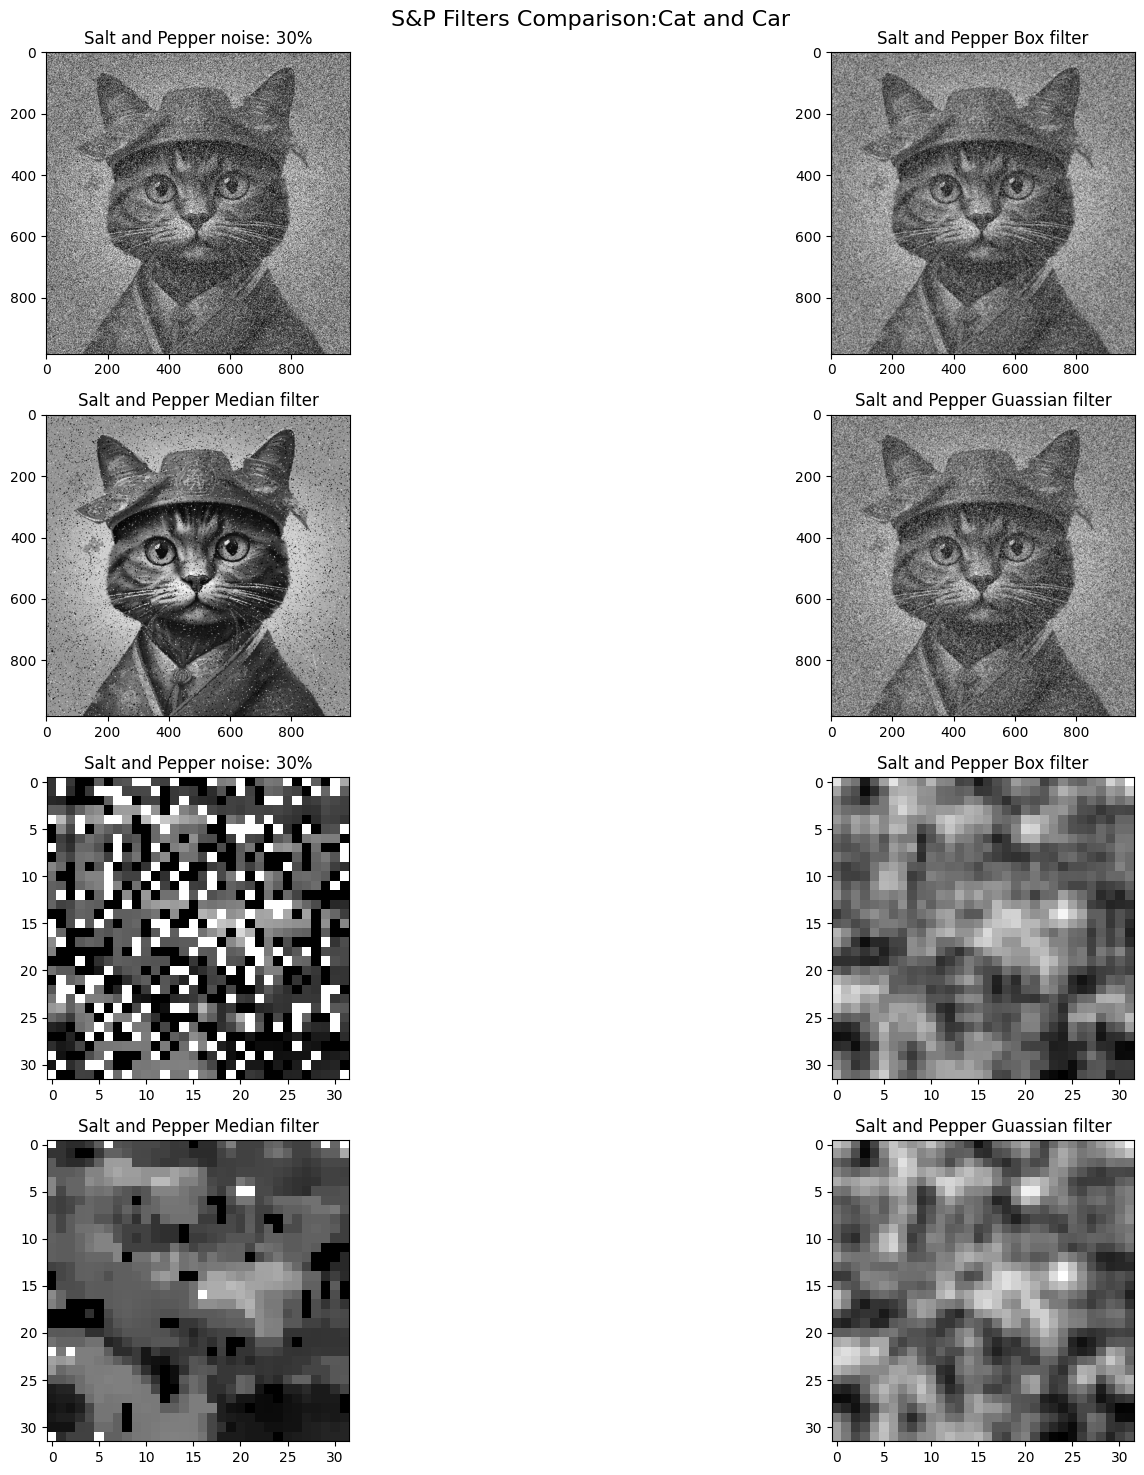

In [92]:
plt.figure(figsize=(20, 15))
plt.subplot(4,2,1)
plt.imshow(noisy_salt_pepper, cmap='gray')
plt.title('Salt and Pepper noise: 30%')

plt.subplot(4,2,2)
plt.imshow(box_filter_salt_pepper, cmap='gray')
plt.title('Salt and Pepper Box filter')

plt.subplot(4,2,3)
plt.imshow(median_filter_salt_pepper, cmap='gray')
plt.title('Salt and Pepper Median filter')

plt.subplot(4,2,4)
plt.imshow(guassian_filter_salt_pepper, cmap='gray')
plt.title('Salt and Pepper Guassian filter')


plt.subplot(4,2,5)
plt.imshow(car_noisy_salt_pepper, cmap='gray')
plt.title('Salt and Pepper noise: 30%')

plt.subplot(4,2,6)
plt.imshow(car_box_filter_salt_pepper, cmap='gray')
plt.title('Salt and Pepper Box filter')

plt.subplot(4,2,7)
plt.imshow(car_median_filter_salt_pepper, cmap='gray')
plt.title('Salt and Pepper Median filter')

plt.subplot(4,2,8)
plt.imshow(car_guassian_filter_salt_pepper, cmap='gray')
plt.title('Salt and Pepper Guassian filter')

plt.suptitle('S&P Filters Comparison:Cat and Car', fontsize=16)
plt.tight_layout()
plt.show()

***Part 5***
- Vary the kernel size to 5 x 5 and 10 x 10 and show its effect on the output image.

In [93]:
noisy_guassian_image = guassian_noise(gray_image, 50)
noisy_salt_pepper = salt_pepper_noise(gray_image, 0.3, 0.3)

box_filter_guassian = box_filter(noisy_guassian_image, 5)
box_filter_salt_pepper = box_filter(noisy_salt_pepper, 5)

median_filter_guassian = median_filter(noisy_guassian_image, 5)
median_filter_salt_pepper = median_filter(noisy_salt_pepper, 5)

guassian_filter_guassian = guassian_filter(noisy_guassian_image, 5)
guassian_filter_salt_pepper = guassian_filter(noisy_salt_pepper, 5)

car_noisy_guassian_image = guassian_noise(car_gray_image, 50)
car_noisy_salt_pepper = salt_pepper_noise(car_gray_image, 0.3, 0.3)

car_car_box_filter_guassian = box_filter(car_noisy_guassian_image, 5)
car_box_filter_salt_pepper = box_filter(car_noisy_salt_pepper, 5)

car_median_filter_guassian = median_filter(car_noisy_guassian_image, 5)
car_median_filter_salt_pepper = median_filter(car_noisy_salt_pepper, 5)

car_guassian_filter_guassian = guassian_filter(car_noisy_guassian_image, 5)
car_guassian_filter_salt_pepper = guassian_filter(car_noisy_salt_pepper, 5)

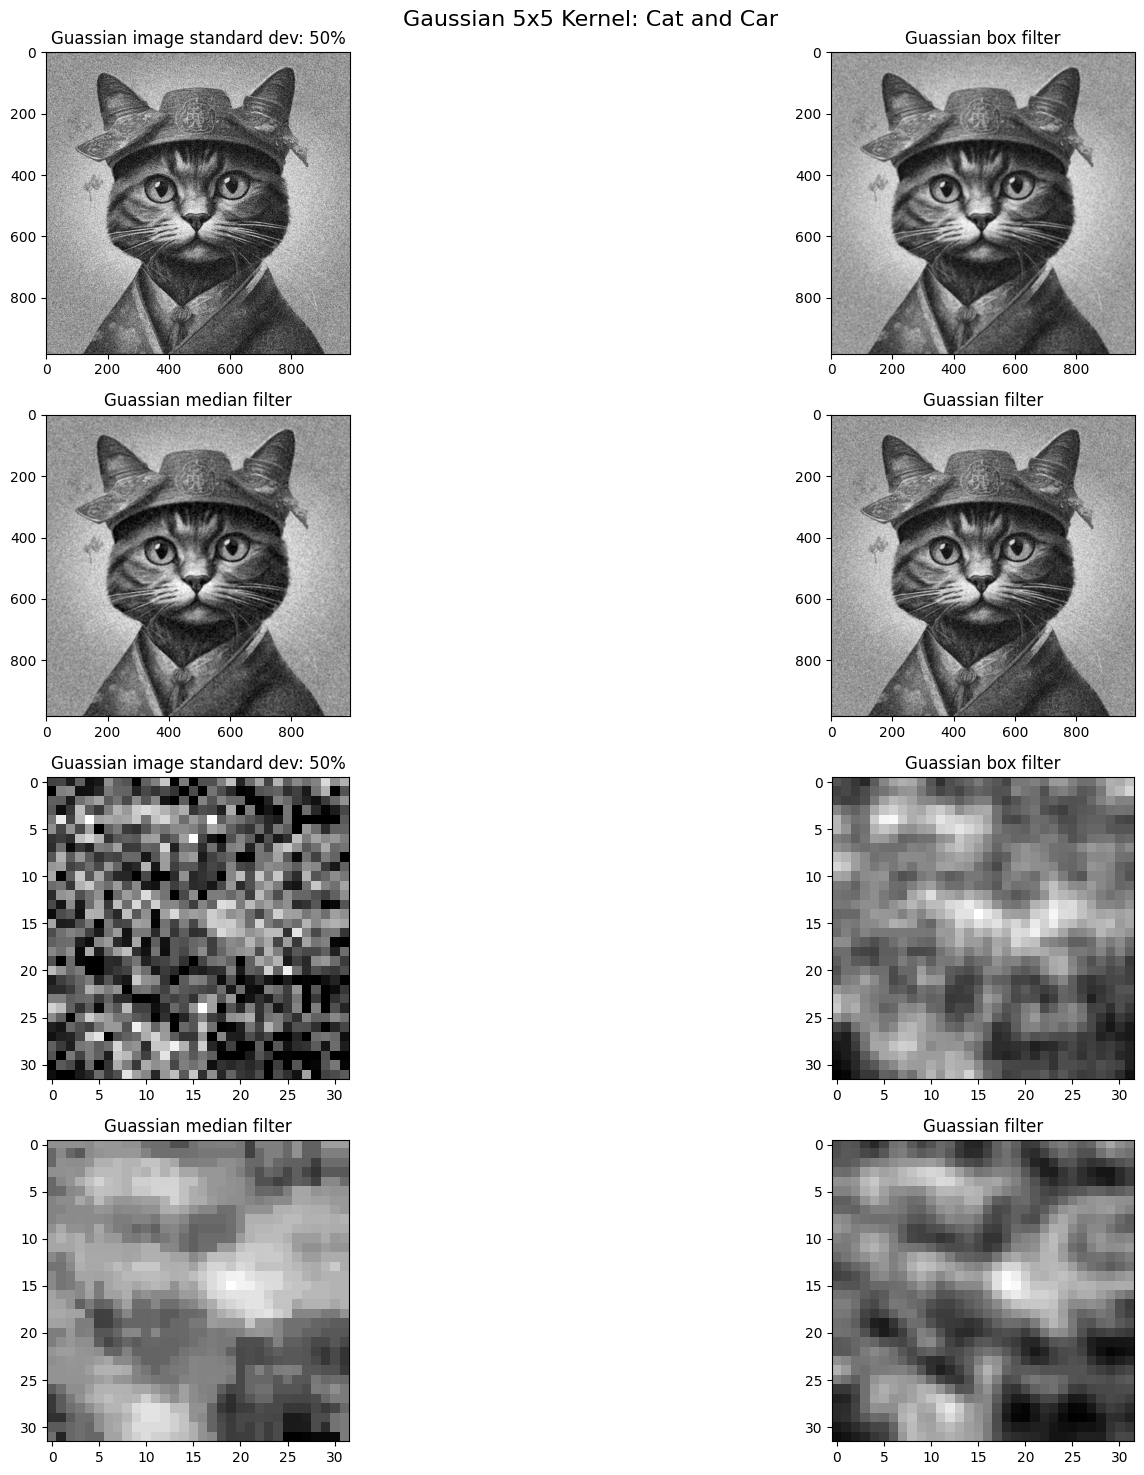

In [94]:
plt.figure(figsize=(20, 15))

#cat
plt.subplot(4,2,1)
plt.imshow(noisy_guassian_image, cmap='gray')
plt.title('Guassian image standard dev: 50%')

plt.subplot(4,2,2)
plt.imshow(box_filter_guassian, cmap='gray')
plt.title('Guassian box filter')

plt.subplot(4,2,3)
plt.imshow(median_filter_guassian, cmap='gray')
plt.title('Guassian median filter')

plt.subplot(4,2,4)
plt.imshow(guassian_filter_guassian, cmap='gray')
plt.title('Guassian filter')

#car
plt.subplot(4,2,5)
plt.imshow(car_noisy_guassian_image, cmap='gray')
plt.title('Guassian image standard dev: 50%')

plt.subplot(4,2,6)
plt.imshow(car_box_filter_guassian, cmap='gray')
plt.title('Guassian box filter')

plt.subplot(4,2,7)
plt.imshow(car_median_filter_guassian, cmap='gray')
plt.title('Guassian median filter')

plt.subplot(4,2,8)
plt.imshow(car_guassian_filter_guassian, cmap='gray')
plt.title('Guassian filter')

plt.suptitle('Gaussian 5x5 Kernel: Cat and Car', fontsize=16)
plt.tight_layout()
plt.show()

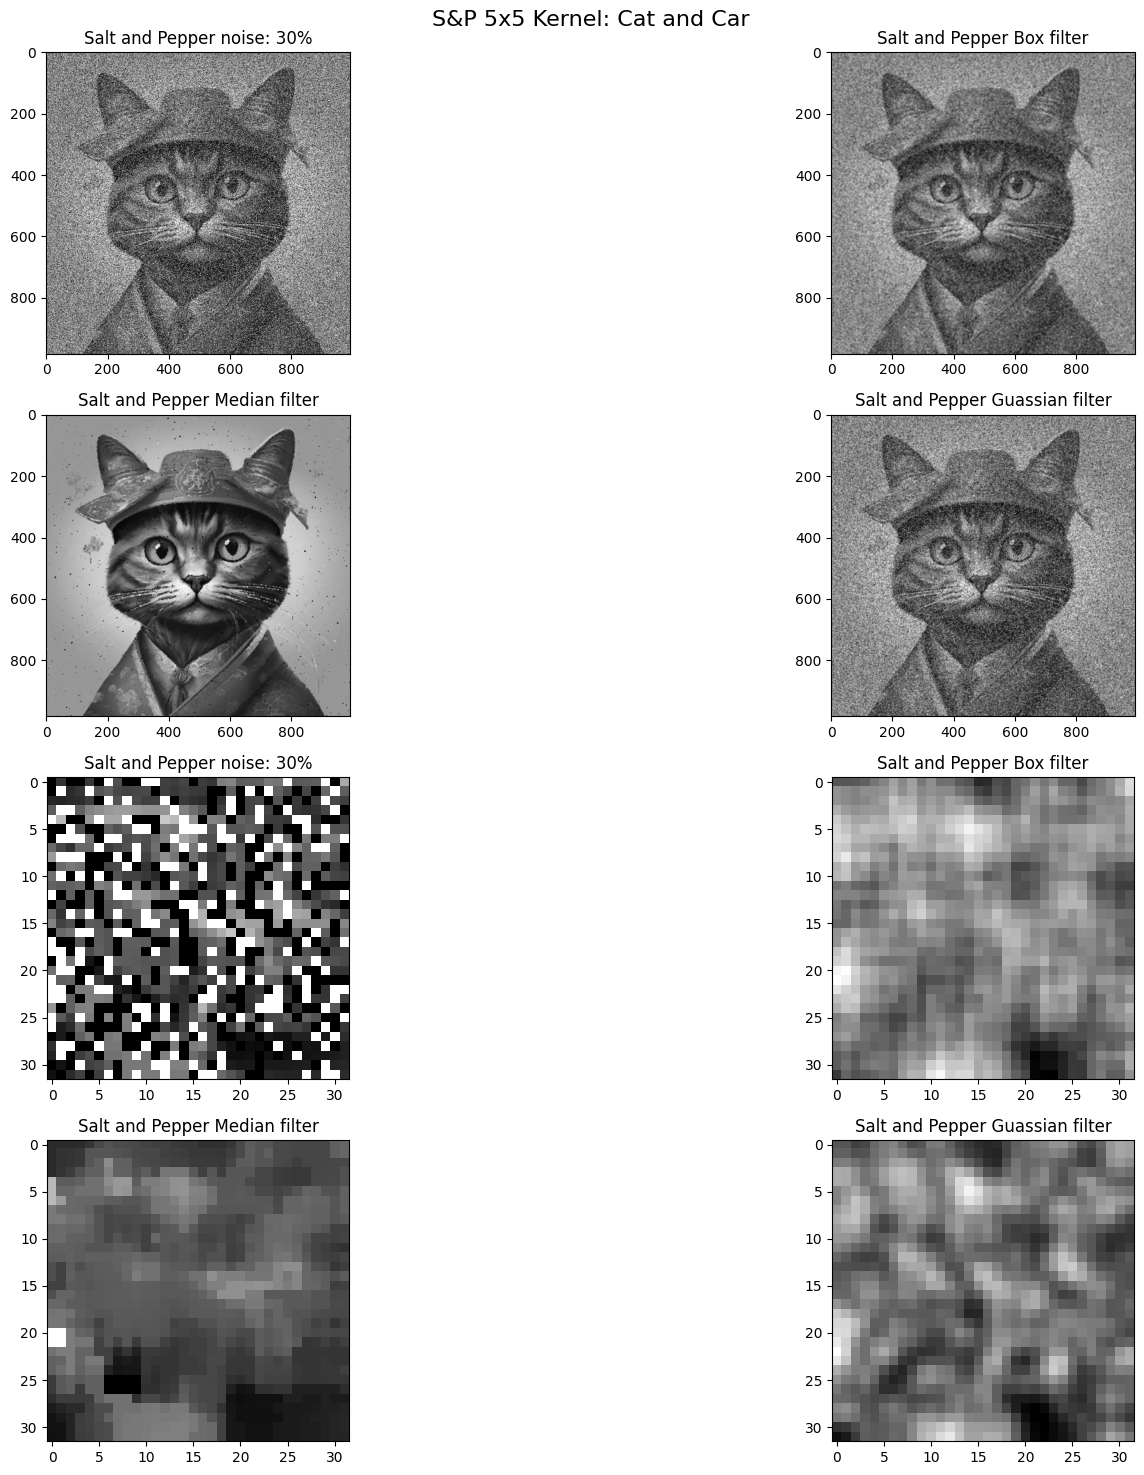

In [95]:
plt.figure(figsize=(20, 15))
plt.subplot(4,2,1)
plt.imshow(noisy_salt_pepper, cmap='gray')
plt.title('Salt and Pepper noise: 30%')

plt.subplot(4,2,2)
plt.imshow(box_filter_salt_pepper, cmap='gray')
plt.title('Salt and Pepper Box filter')

plt.subplot(4,2,3)
plt.imshow(median_filter_salt_pepper, cmap='gray')
plt.title('Salt and Pepper Median filter')

plt.subplot(4,2,4)
plt.imshow(guassian_filter_salt_pepper, cmap='gray')
plt.title('Salt and Pepper Guassian filter')


plt.subplot(4,2,5)
plt.imshow(car_noisy_salt_pepper, cmap='gray')
plt.title('Salt and Pepper noise: 30%')

plt.subplot(4,2,6)
plt.imshow(car_box_filter_salt_pepper, cmap='gray')
plt.title('Salt and Pepper Box filter')

plt.subplot(4,2,7)
plt.imshow(car_median_filter_salt_pepper, cmap='gray')
plt.title('Salt and Pepper Median filter')

plt.subplot(4,2,8)
plt.imshow(car_guassian_filter_salt_pepper, cmap='gray')
plt.title('Salt and Pepper Guassian filter')

plt.suptitle('S&P 5x5 Kernel: Cat and Car', fontsize=16)
plt.tight_layout()
plt.show()

In [96]:
noisy_guassian_image = guassian_noise(gray_image, 50)
noisy_salt_pepper = salt_pepper_noise(gray_image, 0.3, 0.3)

box_filter_guassian = box_filter(noisy_guassian_image, 10)
box_filter_salt_pepper = box_filter(noisy_salt_pepper, 10)

median_filter_guassian = median_filter(noisy_guassian_image, 10)
median_filter_salt_pepper = median_filter(noisy_salt_pepper, 10)

guassian_filter_guassian = guassian_filter(noisy_guassian_image, 10)
guassian_filter_salt_pepper = guassian_filter(noisy_salt_pepper, 10)


car_noisy_guassian_image = guassian_noise(car_gray_image, 50)
car_noisy_salt_pepper = salt_pepper_noise(car_gray_image, 0.3, 0.3)

car_box_filter_guassian = box_filter(car_noisy_guassian_image, 10)
car_box_filter_salt_pepper = box_filter(car_noisy_salt_pepper, 10)

car_median_filter_guassian = median_filter(car_noisy_guassian_image, 10)
car_median_filter_salt_pepper = median_filter(car_noisy_salt_pepper, 10)

car_guassian_filter_guassian = guassian_filter(car_noisy_guassian_image, 10)
car_guassian_filter_salt_pepper = guassian_filter(car_noisy_salt_pepper, 10)

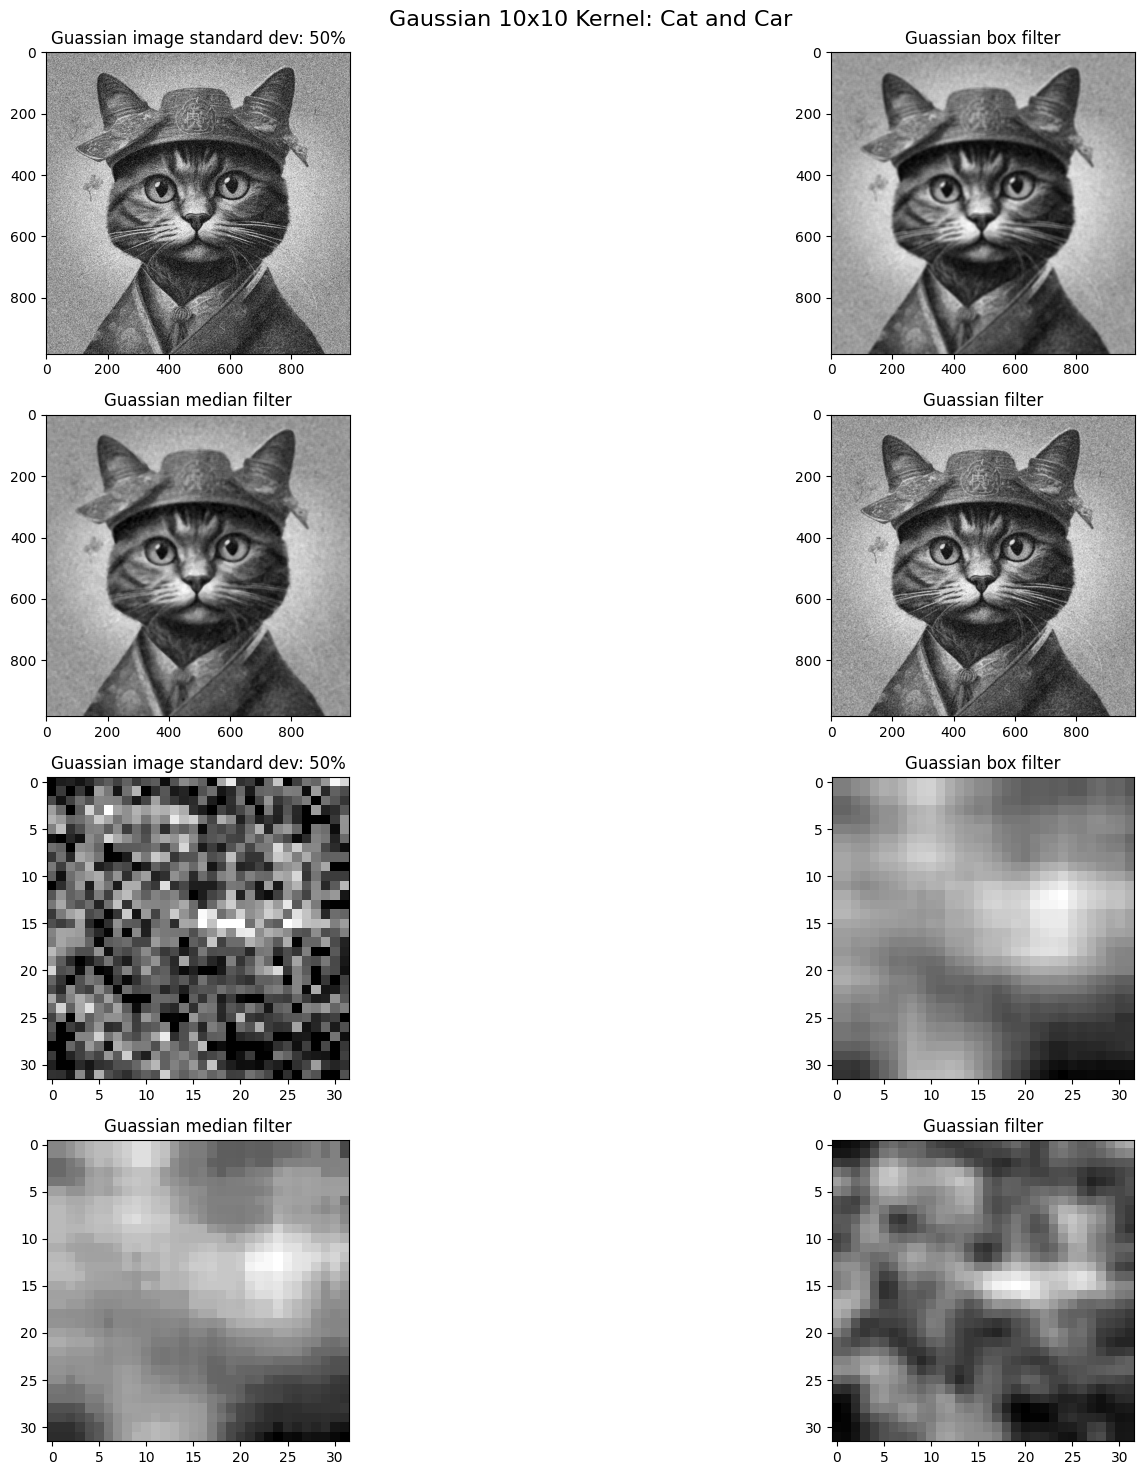

In [97]:
plt.figure(figsize=(20, 15))

#cat
plt.subplot(4,2,1)
plt.imshow(noisy_guassian_image, cmap='gray')
plt.title('Guassian image standard dev: 50%')

plt.subplot(4,2,2)
plt.imshow(box_filter_guassian, cmap='gray')
plt.title('Guassian box filter')

plt.subplot(4,2,3)
plt.imshow(median_filter_guassian, cmap='gray')
plt.title('Guassian median filter')

plt.subplot(4,2,4)
plt.imshow(guassian_filter_guassian, cmap='gray')
plt.title('Guassian filter')

#car
plt.subplot(4,2,5)
plt.imshow(car_noisy_guassian_image, cmap='gray')
plt.title('Guassian image standard dev: 50%')

plt.subplot(4,2,6)
plt.imshow(car_box_filter_guassian, cmap='gray')
plt.title('Guassian box filter')

plt.subplot(4,2,7)
plt.imshow(car_median_filter_guassian, cmap='gray')
plt.title('Guassian median filter')

plt.subplot(4,2,8)
plt.imshow(car_guassian_filter_guassian, cmap='gray')
plt.title('Guassian filter')

plt.suptitle('Gaussian 10x10 Kernel: Cat and Car', fontsize=16)
plt.tight_layout()
plt.show()

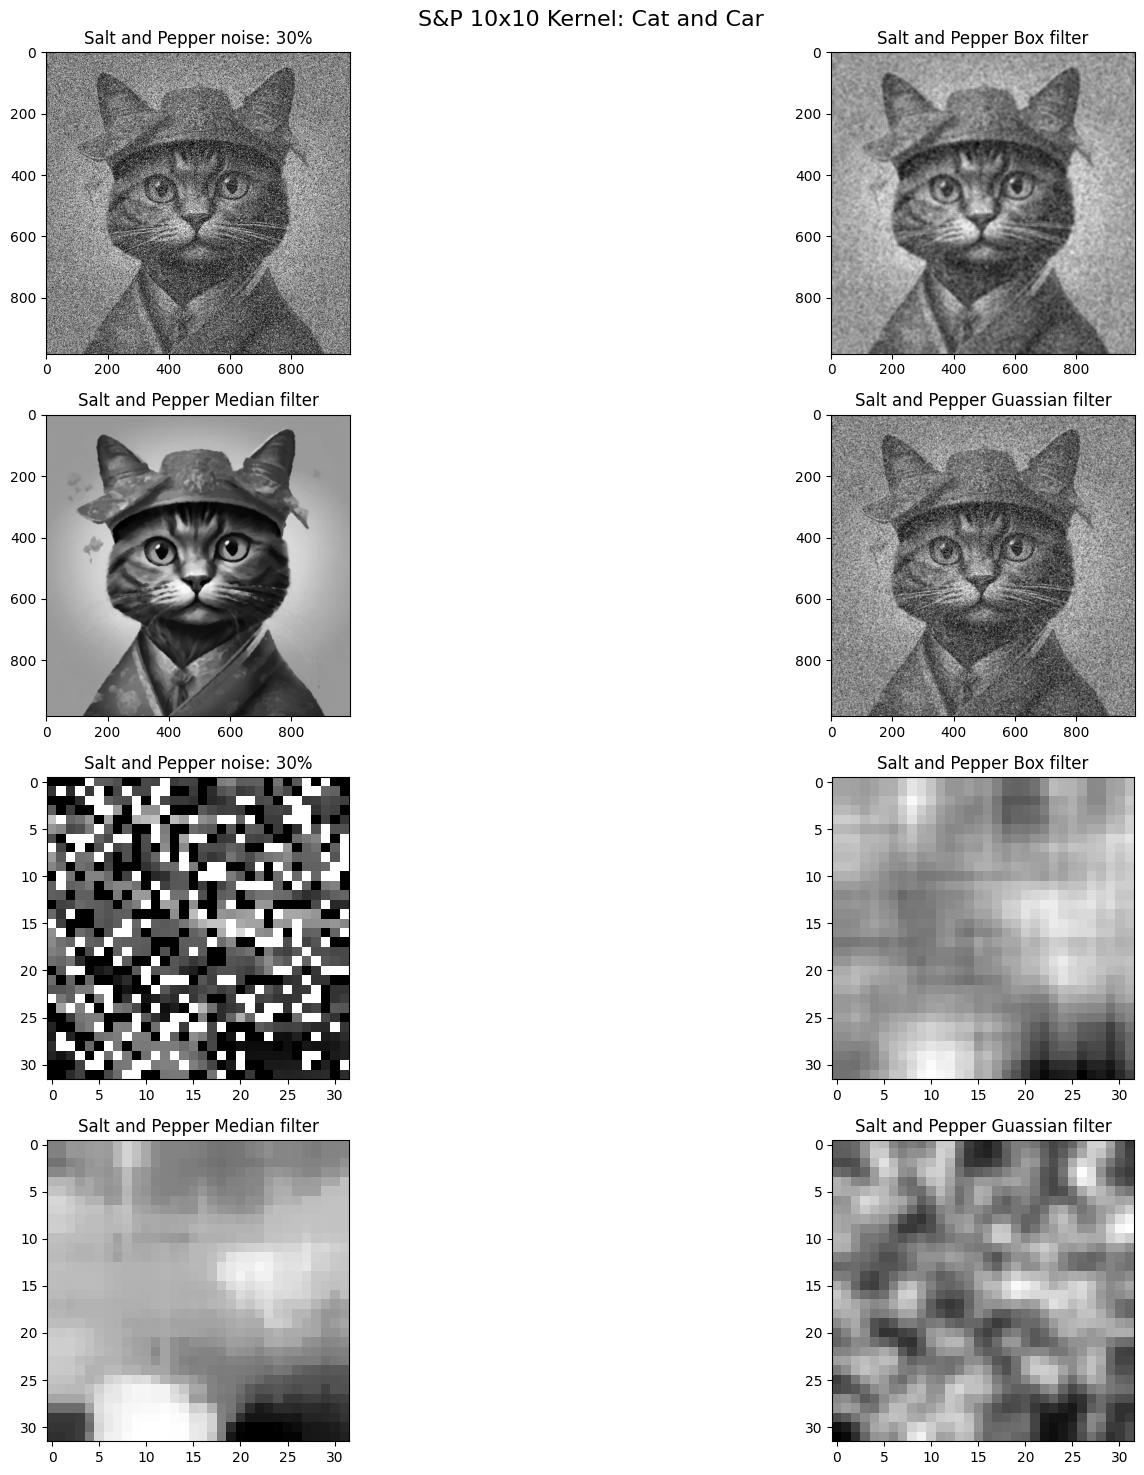

In [98]:
plt.figure(figsize=(20, 15))
plt.subplot(4,2,1)
plt.imshow(noisy_salt_pepper, cmap='gray')
plt.title('Salt and Pepper noise: 30%')

plt.subplot(4,2,2)
plt.imshow(box_filter_salt_pepper, cmap='gray')
plt.title('Salt and Pepper Box filter')

plt.subplot(4,2,3)
plt.imshow(median_filter_salt_pepper, cmap='gray')
plt.title('Salt and Pepper Median filter')

plt.subplot(4,2,4)
plt.imshow(guassian_filter_salt_pepper, cmap='gray')
plt.title('Salt and Pepper Guassian filter')


plt.subplot(4,2,5)
plt.imshow(car_noisy_salt_pepper, cmap='gray')
plt.title('Salt and Pepper noise: 30%')

plt.subplot(4,2,6)
plt.imshow(car_box_filter_salt_pepper, cmap='gray')
plt.title('Salt and Pepper Box filter')

plt.subplot(4,2,7)
plt.imshow(car_median_filter_salt_pepper, cmap='gray')
plt.title('Salt and Pepper Median filter')

plt.subplot(4,2,8)
plt.imshow(car_guassian_filter_salt_pepper, cmap='gray')
plt.title('Salt and Pepper Guassian filter')

plt.suptitle('S&P 10x10 Kernel: Cat and Car', fontsize=16)
plt.tight_layout()
plt.show()